## numpy.linalg.solve
### linalg.solve(a, b)

- Solve a linear matrix equation, or system of linear scalar equations, **ax = b**
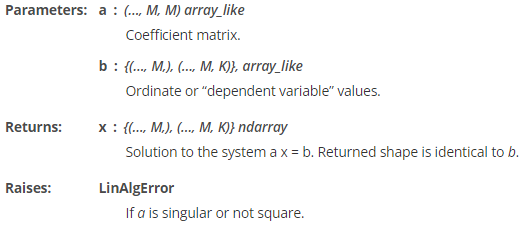

**Here b can be shape of (..., M) or (..., M, K)**

### Case_1 -> b : (…, M,)
https://github.com/numpy/numpy/blob/v1.23.0/numpy/linalg/linalg.py#L393
- Numpy use the b = (…, M,) logic, only if the number of extra dimensions match exactly
- i.e (b.ndim == a.ndim - 1)

### solve1 (numpy use solve1() for this case)
https://github.com/numpy/numpy/blob/v1.23.0/numpy/linalg/umath_linalg.cpp#L4318-L4328

(m,m),(m)->(m)
- solve the system a x = b, for b being a vector, broadcast in the outer dimensions.
- Results in vectors with the solutions.
- “(m,m),(m)->(m)”

In [463]:
import numpy as np

#### Preparing data having (b.ndim == a.ndim - 1)

In [464]:
a1 = np.full((5,5), np.eye(5))
b1 = np.arange(5)

a2 = np.full((3, 5, 5), np.eye(5))
b2 = np.arange(3 * 5).reshape(3, 5)

a3 = np.full((3, 5, 5), np.eye(5))
b3 = np.arange(2 * 5).reshape(2, 5)

a4 = np.full((2, 5, 5), np.eye(5))
b4 = np.arange(1 * 5).reshape(1, 5)

a5 = np.full((2, 5, 5), np.eye(5))
b5 = np.arange(5 * 5).reshape(5, 5)

a6 = np.full((1, 5, 5), np.eye(5))
b6 = np.arange(5 * 5).reshape(5, 5)

a7 = np.full((2, 3, 5, 5), np.eye(5))
b7 = np.arange(2 * 3 * 5).reshape(2, 3, 5)

a8 = np.full((2, 3, 5, 5), np.eye(5))
b8 = np.arange(2 * 3 * 5).reshape(3, 2, 5)

a9 = np.full((2, 3, 5, 5), np.eye(5))
b9 = np.arange(5 * 1 * 5).reshape(5, 1, 5)

#### Shape of A & B

In [465]:
print("Sno\tA-dims \t B-dims\t A-shape \t B-shape")
print("------------------------------------------------")
g = globals()

for i in range(1, 10):
    a = g["a"+str(i)]
    b = g["b"+str(i)]
    print(i, "\t", a.ndim, "\t", b.ndim, "\t", a.shape, "\t", b.shape)

Sno	A-dims 	 B-dims	 A-shape 	 B-shape
------------------------------------------------
1 	 2 	 1 	 (5, 5) 	 (5,)
2 	 3 	 2 	 (3, 5, 5) 	 (3, 5)
3 	 3 	 2 	 (3, 5, 5) 	 (2, 5)
4 	 3 	 2 	 (2, 5, 5) 	 (1, 5)
5 	 3 	 2 	 (2, 5, 5) 	 (5, 5)
6 	 3 	 2 	 (1, 5, 5) 	 (5, 5)
7 	 4 	 3 	 (2, 3, 5, 5) 	 (2, 3, 5)
8 	 4 	 3 	 (2, 3, 5, 5) 	 (3, 2, 5)
9 	 4 	 3 	 (2, 3, 5, 5) 	 (5, 1, 5)


#### Testing Numpy solve() & Printing output shape

In [466]:
print("Sno\tA-dims \t B-dims\t A-shape \t B-shape \t X-shape")
print("-----------------------------------------------------------------")
g = globals()

for i in range(1, 10):
    a = g["a"+str(i)]
    b = g["b"+str(i)]
    try:
        result = np.linalg.solve(a, b)
        x = result.shape
    except:
        x = "Error"
        
    print(i, "\t", a.ndim, "\t", b.ndim, "\t", a.shape, "\t", b.shape, "\t", x)

Sno	A-dims 	 B-dims	 A-shape 	 B-shape 	 X-shape
-----------------------------------------------------------------
1 	 2 	 1 	 (5, 5) 	 (5,) 	 (5,)
2 	 3 	 2 	 (3, 5, 5) 	 (3, 5) 	 (3, 5)
3 	 3 	 2 	 (3, 5, 5) 	 (2, 5) 	 Error
4 	 3 	 2 	 (2, 5, 5) 	 (1, 5) 	 (2, 5)
5 	 3 	 2 	 (2, 5, 5) 	 (5, 5) 	 Error
6 	 3 	 2 	 (1, 5, 5) 	 (5, 5) 	 (5, 5)
7 	 4 	 3 	 (2, 3, 5, 5) 	 (2, 3, 5) 	 (2, 3, 5)
8 	 4 	 3 	 (2, 3, 5, 5) 	 (3, 2, 5) 	 Error
9 	 4 	 3 	 (2, 3, 5, 5) 	 (5, 1, 5) 	 Error


### Case_2 -> b : (…, M, K)
https://github.com/numpy/numpy/blob/v1.23.0/numpy/linalg/linalg.py#L395
- Numpy use b = (…, M,K) logic, when (b.ndim != a.ndim - 1)

### solve (numpy uses solve() for this case)
https://github.com/numpy/numpy/blob/v1.23.0/numpy/linalg/umath_linalg.cpp#L4307-L4317

(m,m),(m,n)->(m,n)
- solve the system a x = b, on the last two dimensions, broadcast to the rest.
- Results in a matrices with the solutions.
- "(m,m),(m,n)->(m,n)\"

#### Preparing data having (b.ndim != a.ndim - 1)

In [467]:
a10 = np.full((5,5), np.eye(5))
b10 = np.arange(5).reshape(5,1)

a11 = np.full((3, 5, 5), np.eye(5))
b11 = np.arange(3 * 5 * 2).reshape(3, 5, 2)

a12 = np.full((3, 5, 5), np.eye(5))
b12 = np.arange(2 * 5 * 3).reshape(2, 5, 3)

a13 = np.full((3, 5, 5), np.eye(5))
b13 = np.arange(1 * 5 * 3).reshape(1, 5, 3)

a14 = np.full((2, 5, 5), np.eye(5))
b14 = np.arange(1 * 5 * 5).reshape(1, 5, 5)

a15 = np.full((10, 5, 5), np.eye(5))
b15 = np.arange(1 * 5 * 10).reshape(10, 5, 1)

a16 = np.full((2, 3, 5, 5), np.eye(5))
b16 = np.arange(2 * 3 * 5 * 7).reshape(2, 3, 5, 7)

a17 = np.full((2, 3, 5, 5), np.eye(5))
b17 = np.arange(2 * 3 * 5 * 5).reshape(5, 3, 5, 2)

a18 = np.full((2, 3, 5, 5), np.eye(5))
b18 = np.arange(2 * 3 * 5 * 5).reshape(2, 5, 5, 3)

a19 = np.full((2, 3, 5, 5), np.eye(5))
b19 = np.arange(2 * 3 * 5 * 5).reshape(3, 2, 5, 5)

#### Shape of A & B

In [468]:
print("Sno\tA-dims \t B-dims\t A-shape \t B-shape")
print("------------------------------------------------")
g = globals()

for i in range(10, 20):
    a = g["a"+str(i)]
    b = g["b"+str(i)]
    print(i, "\t", a.ndim, "\t", b.ndim, "\t", a.shape, "\t", b.shape)

Sno	A-dims 	 B-dims	 A-shape 	 B-shape
------------------------------------------------
10 	 2 	 2 	 (5, 5) 	 (5, 1)
11 	 3 	 3 	 (3, 5, 5) 	 (3, 5, 2)
12 	 3 	 3 	 (3, 5, 5) 	 (2, 5, 3)
13 	 3 	 3 	 (3, 5, 5) 	 (1, 5, 3)
14 	 3 	 3 	 (2, 5, 5) 	 (1, 5, 5)
15 	 3 	 3 	 (10, 5, 5) 	 (10, 5, 1)
16 	 4 	 4 	 (2, 3, 5, 5) 	 (2, 3, 5, 7)
17 	 4 	 4 	 (2, 3, 5, 5) 	 (5, 3, 5, 2)
18 	 4 	 4 	 (2, 3, 5, 5) 	 (2, 5, 5, 3)
19 	 4 	 4 	 (2, 3, 5, 5) 	 (3, 2, 5, 5)


#### Testing Numpy solve() & Printing output shape

In [469]:
print("Sno\tA-dims \t B-dims\t A-shape \t B-shape \t X-shape")
print("-----------------------------------------------------------------")
g = globals()

for i in range(10, 20):
    a = g["a"+str(i)]
    b = g["b"+str(i)]
    try:
        result = np.linalg.solve(a, b)
        x = result.shape
    except:
        x = "Error"
        
    print(i, "\t", a.ndim, "\t", b.ndim, "\t", a.shape, "\t", b.shape, "\t", x)

Sno	A-dims 	 B-dims	 A-shape 	 B-shape 	 X-shape
-----------------------------------------------------------------
10 	 2 	 2 	 (5, 5) 	 (5, 1) 	 (5, 1)
11 	 3 	 3 	 (3, 5, 5) 	 (3, 5, 2) 	 (3, 5, 2)
12 	 3 	 3 	 (3, 5, 5) 	 (2, 5, 3) 	 Error
13 	 3 	 3 	 (3, 5, 5) 	 (1, 5, 3) 	 (3, 5, 3)
14 	 3 	 3 	 (2, 5, 5) 	 (1, 5, 5) 	 (2, 5, 5)
15 	 3 	 3 	 (10, 5, 5) 	 (10, 5, 1) 	 (10, 5, 1)
16 	 4 	 4 	 (2, 3, 5, 5) 	 (2, 3, 5, 7) 	 (2, 3, 5, 7)
17 	 4 	 4 	 (2, 3, 5, 5) 	 (5, 3, 5, 2) 	 Error
18 	 4 	 4 	 (2, 3, 5, 5) 	 (2, 5, 5, 3) 	 Error
19 	 4 	 4 	 (2, 3, 5, 5) 	 (3, 2, 5, 5) 	 Error


## Observation

#### For Case_1 -> b : (…, M,)

In [470]:
a = a7
b = b7

a.shape, b.shape

((2, 3, 5, 5), (2, 3, 5))

In [471]:
np.linalg.solve(a, b).shape

(2, 3, 5)

In [472]:
a_dash = a[...,0,0]   # Remove last 2 dimension, a : (…, M,M)
b_dash = b[...,0]     # Remove last 1 dimension, a : (…, M,)
x = np.broadcast(a_dash, b_dash)   # broadcast remaining dimensions
x.shape

(2, 3)

In [473]:
x.shape + b.shape[-1:]   # add (M,) to result => (M, M), (M) -> (M)

(2, 3, 5)

#### for Case_2 -> b : (…, M, K)

In [474]:
a = a16
b = b16

a.shape, b.shape

((2, 3, 5, 5), (2, 3, 5, 7))

In [475]:
np.linalg.solve(a, b).shape

(2, 3, 5, 7)

In [476]:
a_dash = a[...,0,0]   # Remove last 2 dimension, a : (…, M,M)
b_dash = b[...,0,0]     # Remove last 2 dimension, a : (…, M,K)
x = np.broadcast(a_dash, b_dash)   # broadcast remaining dimensions
x.shape

(2, 3)

In [477]:
x.shape + b.shape[-2:]   # add (M,K) to result => (M, M), (M, K) -> (M, K)

(2, 3, 5, 7)

## Verifying formula for all the output shape

In [478]:
print("Sno\tA-dims \t B-dims\t A-shape \t B-shape \t X-shape \t infer_shape")
print("----------------------------------------------------------------------------------")
g = globals()

for i in range(1, 20):
    a = g["a"+str(i)]
    b = g["b"+str(i)]
    try:
        x = g["x"+str(i)].shape
    except:
        x = "Error"
        
    #---------------------------------------------------------------------
    # Calculate infet_shape
    
    # Case_1 -> b : (…, M,)
    if(b.ndim == a.ndim - 1):
        a_dash = a[...,0,0]   # Remove last 2 dimension, a : (…, M,M)
        b_dash = b[...,0]     # Remove last 1 dimension, b : (…, M,)
        try:
            # try to broadcast remaining dimensions and add (M,) to it => (M, M), (M) -> (M)
            infer_shape = np.broadcast(a_dash, b_dash).shape + tuple(b.shape[-1:])
        except:
            # Incorrect number of input dimensions. Cannot infer shape.
            infer_shape = "Error"
    
    # Case_2 -> b : (…, M,K)
    else:
        a_dash = a[...,0,0]   # Remove last 2 dimension, a : (…, M,M)
        b_dash = b[...,0,0]   # Remove last 2 dimension, b : (…, M,K)
        try:
            # try to broadcast remaining dimensions and add (M,K) to it => (M, M), (M, K) -> (M, K)
            infer_shape = np.broadcast(a_dash, b_dash).shape + tuple(b.shape[-2:])
        except:
            # Incorrect number of input dimensions. Cannot infer shape.
            infer_shape = "Error"
    #--------------------------------------------------------------------
    
    #print(i, "\t", a.ndim, "\t", b.ndim, "\t", a.shape, "\t", b.shape, "\t", x, "\t", infer_shape)
    print("{:<7}  {:<7}  {:<7} {:<15} {:<15} {:<15} {:<15}".format(i, a.ndim, b.ndim, str(a.shape), str(b.shape), str(x), str(infer_shape)))

Sno	A-dims 	 B-dims	 A-shape 	 B-shape 	 X-shape 	 infer_shape
----------------------------------------------------------------------------------
1        2        1       (5, 5)          (5,)            (5,)            (5,)           
2        3        2       (3, 5, 5)       (3, 5)          (3, 5)          (3, 5)         
3        3        2       (3, 5, 5)       (2, 5)          Error           Error          
4        3        2       (2, 5, 5)       (1, 5)          (2, 5)          (2, 5)         
5        3        2       (2, 5, 5)       (5, 5)          Error           Error          
6        3        2       (1, 5, 5)       (5, 5)          (5, 5)          (5, 5)         
7        4        3       (2, 3, 5, 5)    (2, 3, 5)       (2, 3, 5)       (2, 3, 5)      
8        4        3       (2, 3, 5, 5)    (3, 2, 5)       Error           Error          
9        4        3       (2, 3, 5, 5)    (5, 1, 5)       Error           Error          
10       2        2       (5, 5)          (5

#### Other Referance
https://stackoverflow.com/questions/48387261/numpy-linalg-solve-with-right-hand-side-of-more-than-three-dimensions

Broadcast rule: https://numpy.org/devdocs/user/basics.broadcasting.html#broadcastable-arrays

https://stackoverflow.com/questions/47243451/checking-if-two-arrays-are-broadcastable-in-python

https://stackoverflow.com/questions/37152031/numpy-remove-a-dimension-from-np-array